In [1]:
%%writefile digitStructMatToCsv.py

import sys
import digitStruct

def writeToCsvFile(dsFileName, csvFile):
    fileCount = 0
    csvFile.write("FileName,DigitLabel,Left,Top,Width,Height\n")
    for dsObj in digitStruct.yieldNextDigitStruct(dsFileName):
        fileCount += 1
        for bbox in dsObj.bboxList:
            csvLine = "{},{},{},{},{},{}\n".format(
                dsObj.name,
                bbox.label, bbox.left, bbox.top, bbox.width, bbox.height)
            csvFile.write(csvLine)
    print("Number of image files: {}".format(fileCount))

def convertToCsv(dsFilePath, csvFilePath):
    with open(csvFilePath, "w") as csvFile:
        writeToCsvFile(dsFilePath, csvFile)
 
def main():
    if len(sys.argv) != 3:
        print "Usage:"
        print "    {0} <inputMatFilePath> <outputCsvFilePath>".format(sys.argv[0])
        return
    dsFilePath = sys.argv[1]
    csvFilePath = sys.argv[2]
    print("Converting {0} to {1}".format(dsFilePath, csvFilePath))
    convertToCsv(dsFilePath, csvFilePath)

if __name__ == "__main__":
    main()

  


Overwriting digitStructMatToCsv.py


In [2]:
%run digitStructMatToCsv.py ./train/digitStruct.mat ./train/digitStruct.csv

Converting ./train/digitStruct.mat to ./train/digitStruct.csv
Number of image files: 33402


In [1]:
import pandas as pd
trainpd = pd.read_csv("./train/digitStruct.csv")
trainpd[0:5]

,FileName,DigitLabel,Left,Top,Width,Height
0,1.png,1,246,77,81,219
1,1.png,9,323,81,96,219
2,2.png,2,77,29,23,32
3,2.png,3,98,25,26,32
4,3.png,2,17,5,8,15


In [2]:
from collections import Counter
x_count_a=trainpd['DigitLabel']
#when  label is 10, it is converted to 0 & create new column 'newDigitLabel' in  which 0 exits instead of 10
trainpd['newDigitLabel']=trainpd['DigitLabel'].apply(lambda x : 0 if x == 10 else x)
print("converted 0 frequency:",len(trainpd[trainpd['newDigitLabel']==0]))

('converted 0 frequency:', 4948)


Train data - class label-wise frequency : DigitLabel


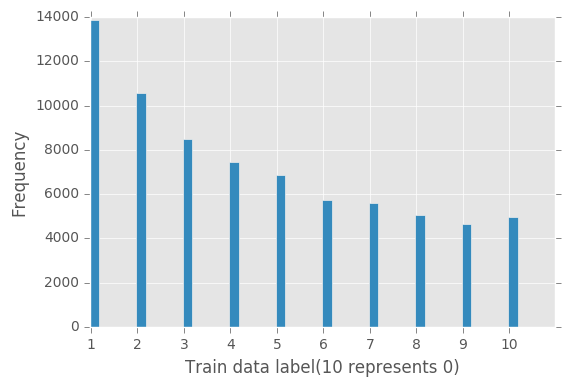

In [3]:
import numpy as np
#import renders as rs
from IPython.display import display 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
print "Train data - class label-wise frequency : DigitLabel"
from collections import Counter
x_count_a=trainpd['DigitLabel']

labels_a, values_a = zip(*Counter(x_count_a).items())
indexes_a=np.arange(len(labels_a))
width=0.2
plt.xlabel('Train data label(10 represents 0)')
plt.ylabel('Frequency')
plt.bar(indexes_a, values_a, width)
plt.xticks(indexes_a + width * 0.1, labels_a)
plt.show()


Train data - class label-wise frequency : DigitLabel


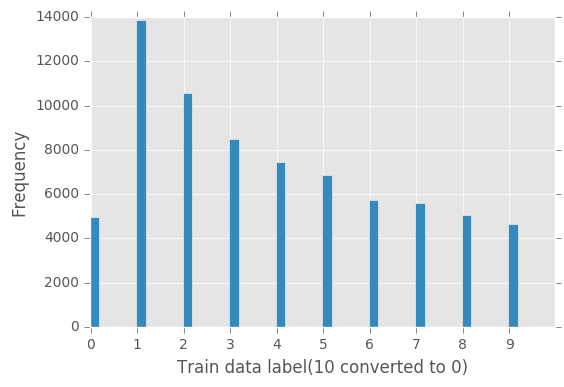

In [4]:

#10 is converted to 0
print "Train data - class label-wise frequency : DigitLabel"
from collections import Counter
x_count_a=trainpd['newDigitLabel']

labels_a, values_a = zip(*Counter(x_count_a).items())
indexes_a=np.arange(len(labels_a))
width=0.2
plt.xlabel('Train data label(10 converted to 0)')
plt.ylabel('Frequency')
plt.bar(indexes_a, values_a, width)
plt.xticks(indexes_a + width * 0.1, labels_a)
plt.show()


In [5]:
testpd = pd.read_csv("./test/digitStruct_test.csv")
testpd[0:5]

,FileName,DigitLabel,Left,Top,Width,Height
0,1.png,5,43,7,19,30
1,2.png,2,99,5,14,23
2,2.png,1,114,8,8,23
3,2.png,10,121,6,12,23
4,3.png,6,61,6,11,16


In [6]:
from collections import Counter
x_count_c=testpd['DigitLabel']
#when  label is 10, it is converted to 0 & create new column 'newDigitLabel' in  which 0 exits instead of 10
testpd['newDigitLabel']=testpd['DigitLabel'].apply(lambda x : 0 if x == 10 else x)
print(len(testpd[testpd['newDigitLabel']==0]))

1744


In [7]:
testpd[0:5]

,FileName,DigitLabel,Left,Top,Width,Height,newDigitLabel
0,1.png,5,43,7,19,30,5
1,2.png,2,99,5,14,23,2
2,2.png,1,114,8,8,23,1
3,2.png,10,121,6,12,23,0
4,3.png,6,61,6,11,16,6


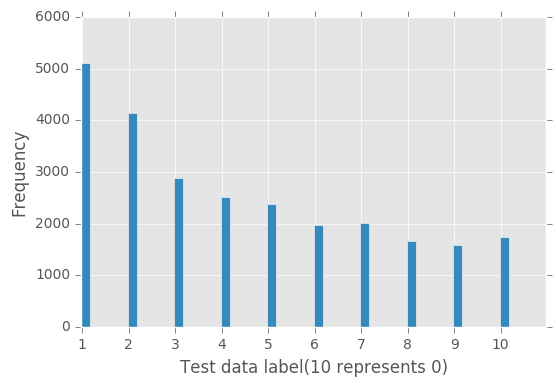

In [8]:
from collections import Counter
x_count_c=testpd['DigitLabel']
labels_c, values_c = zip(*Counter(x_count_c).items())
indexes_c=np.arange(len(labels_c))

indexes_c=np.arange(len(labels_c))
width=0.2
plt.xlabel('Test data label(10 represents 0)')
plt.ylabel('Frequency')
plt.bar(indexes_c, values_c, width)
plt.xticks(indexes_c + width * 0.1, labels_c)
plt.show()

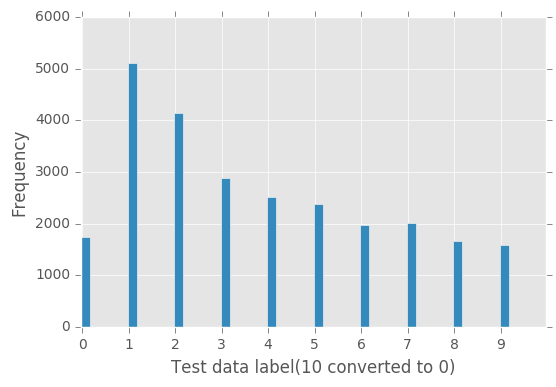

In [9]:
#10 is converted to 0
from collections import Counter
x_count_c=testpd['newDigitLabel']
labels_c, values_c = zip(*Counter(x_count_c).items())
indexes_c=np.arange(len(labels_c))

indexes_c=np.arange(len(labels_c))
width=0.2
plt.xlabel('Test data label(10 converted to 0)')
plt.ylabel('Frequency')
plt.bar(indexes_c, values_c, width)
plt.xticks(indexes_c + width * 0.1, labels_c)
plt.show()

Train data - height-wise frequency : DigitLabel


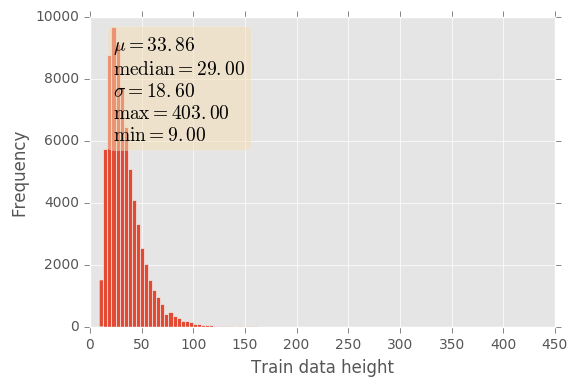

In [10]:
# character height(distance between the top and the bottom of the bounding box)
print "Train data - height-wise frequency : DigitLabel"
#test matplotlib 
#x=np.array(data['Fresh'])
x=trainpd['Height']
fig, ax = plt.subplots(1)
mu = x.mean()
median = np.median(x)
sigma = x.std()
max_v = x.max()
min_v = x.min()
textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{max}=%.2f$\n$\mathrm{min}=%.2f$'%(
            mu, median, sigma,max_v,min_v)
# textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n'%(
#             mu, median, sigma)
plt.xlabel('Train data height')
plt.ylabel('Frequency')
#ax.hist(x, 50)
ax.hist(x, 100)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

Test data - height-wise frequency : DigitLabel


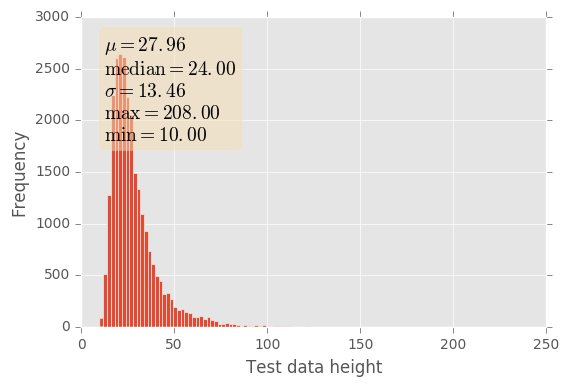

In [44]:
# character height(distance between the top and the bottom of the bounding box)
print "Test data - height-wise frequency : DigitLabel"
#test matplotlib 
#x=np.array(data['Fresh'])
x=testpd['Height']
fig, ax = plt.subplots(1)
mu = x.mean()
median = np.median(x)
sigma = x.std()
max_v = x.max()
min_v = x.min()
textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{max}=%.2f$\n$\mathrm{min}=%.2f$'%(
            mu, median, sigma,max_v,min_v)
# textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n'%(
#             mu, median, sigma)
plt.xlabel('Test data height')
plt.ylabel('Frequency')
#ax.hist(x, 50)
ax.hist(x, 100)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

Train data - width-wise frequency : DigitLabel


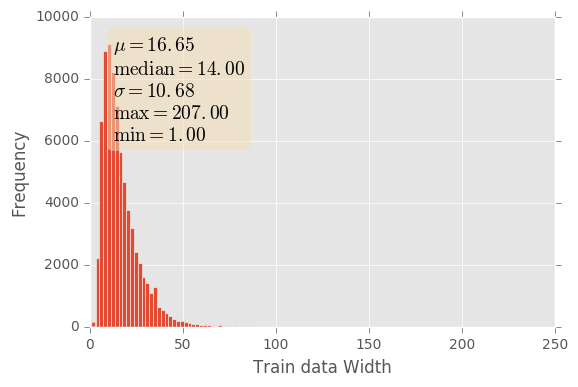

In [40]:
# character width
print "Train data - width-wise frequency : DigitLabel"
#test matplotlib 
#x=np.array(data['Fresh'])
x=trainpd['Width']
fig, ax = plt.subplots(1)
mu = x.mean()
median = np.median(x)
sigma = x.std()
max_v = x.max()
min_v = x.min()
textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{max}=%.2f$\n$\mathrm{min}=%.2f$'%(
            mu, median, sigma,max_v,min_v)
# textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n'%(
#             mu, median, sigma)
plt.xlabel('Train data Width')
plt.ylabel('Frequency')
#ax.hist(x, 50)
ax.hist(x, 100)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

Test data - width-wise frequency : DigitLabel


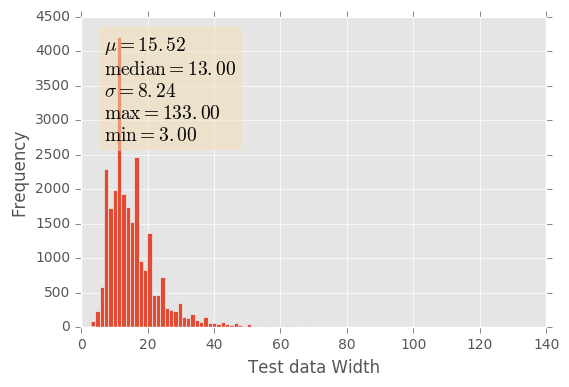

In [41]:
# character width
print "Test data - width-wise frequency : DigitLabel"
#test matplotlib 
#x=np.array(data['Fresh'])
x=testpd['Width']
fig, ax = plt.subplots(1)
mu = x.mean()
median = np.median(x)
sigma = x.std()
max_v = x.max()
min_v = x.min()
textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{max}=%.2f$\n$\mathrm{min}=%.2f$'%(
            mu, median, sigma,max_v,min_v)
# textstr = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n'%(
#             mu, median, sigma)
plt.xlabel('Test data Width')
plt.ylabel('Frequency')
#ax.hist(x, 50)
ax.hist(x, 100)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)